In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=10
paper='2110.11330'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze this Hamiltonian step by step.

From the equation provided, we have:

1. The non-interacting part: $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$
2. The Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
3. The Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Let's answer the questions step by step.

### QUESTION 1: Dimension and Basis Order

The Hamiltonian contains operators $c_{\bm{k},s}^\dagger$ and $c_{\bm{k},s}$, where $s$ seems to be the only flavor (potentially representing spin or another quantum number).

The index $\bm{k}$ is the momentum, which is treated separately in the Hartree-Fock calculation (it's the N_k part).

So, we have only one flavor type, which I'll call "s". From the summation over s

In [7]:
print(generated_code['thinking'])

Let's analyze this Hamiltonian step by step.

From the equation provided, we have:

1. The non-interacting part: $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$
2. The Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
3. The Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Let's answer the questions step by step.

### QUESTION 1: Dimension and Basis Order

The Hamiltonian contains operators $c_{\bm{k},s}^\dagger$ and $c_{\bm{k},s}$, where $s$ seems to be the only flavor (potentially representing spin or another quantum number).

The index $\bm{k}$ is the momentum, which is treated separately in the Hartree-Fock calculation (it's the N_k part).

So, we have only one flavor type, which I'll call "s". From the summation over s and s', I infer there are multiple values for s. Let

In [8]:
print(generated_code['text'])

# Analysis of Hartree-Fock Hamiltonian on a Triangular Lattice

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: {
   r"\langle c_{k,s}^\dagger c_{k,s}\rangle": "Mean of `exp_val[s, s, :]`",
   r"\langle c_{k,s}^\dagger c_{k,s'} \rangle": "Value of `exp_val[s, s', k]`"
}

TERMS:
- $-\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$ -> H[s, s, k], NI (Energy dispersion)
- $\frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$ -> H[s', s', k'], I (Hartree term)
- $-\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$ -> H[s', s, q], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """Implements a Hartree-Fock Hamiltonian for a system with spin-dependent 
    hopping and interaction terms on a triangular lattice.
    
    Args:

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """Implements a Hartree-Fock Hamiltonian for a system with spin-dependent 
    hopping and interaction terms on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_0': 1.0, 't_1': 0.5, 'U_0': 1.0, 'T': 0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # Two spin flavors
        self.basis_order = {'0': 'spin'}
        # Order for spin flavor: 0=up, 1=down

        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.pr

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_10.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

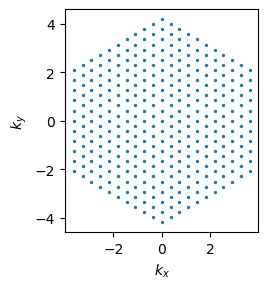

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [19]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [20]:
h_nonint = ham.generate_non_interacting()

In [21]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

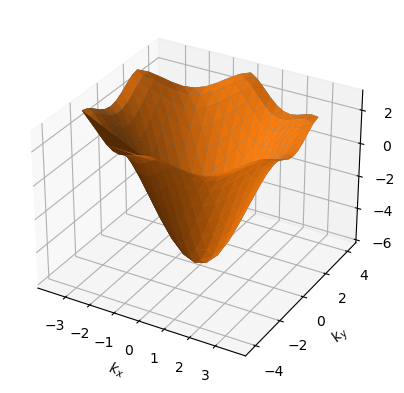

In [22]:
utils_auto.plot_2d_bandstructure(ham,en)

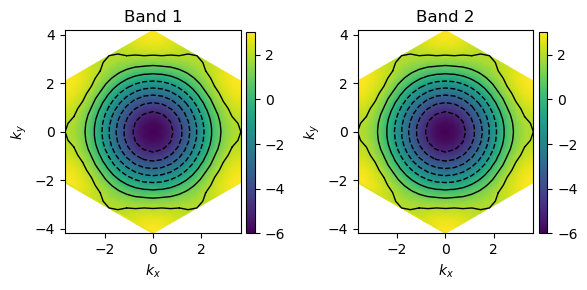

In [23]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [24]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [25]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [26]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


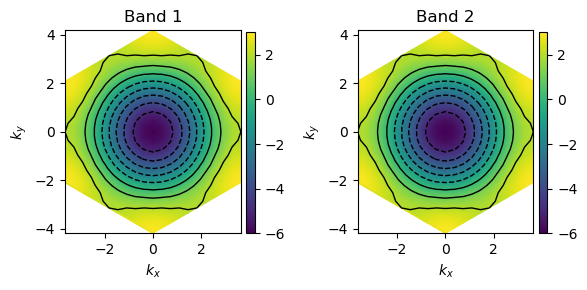

In [27]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [28]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [29]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [30]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 21


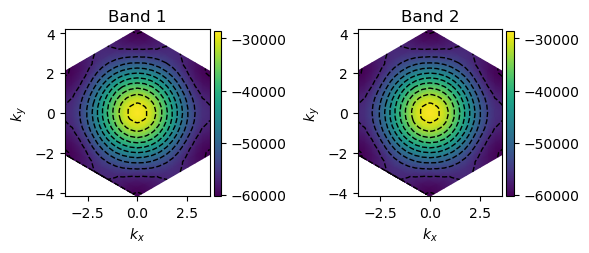

In [31]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [32]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -31656.97
U/T is 23989.78
mean_U is 25311.70


# Auto eval

## Task 1

In [33]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check it against the rubric to determine if it correctly represents the momentum space mesh in the first Brillouin zone for a triangular lattice system with the given Hamiltonian.

First, I'll check the image features:
1. The image shows a hexagonal pattern of points in k-space (momentum space)
2. The axes are labeled as k_x and k_y
3. The points form a mesh covering a region that appears to be from approximately -4 to 4 in both k_x and k_y directions

Let's check this against what we know about triangular lattices:

For a triangular lattice:
- The real space lattice has C6 rotational symmetry (6-fold rotational symmetry)
- The first Brillouin zone is a hexagon in momentum space

Looking at the image, I can see:
1. The points are arranged in a hexagonal pattern, which is consistent with the first Brillouin zone of a triangular lattice
2. The pattern exhibits the expected C6 rotational symmetry (6-fold rot

In [34]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [35]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the provided image of band structures based on the given rubric points. Let me go through each point systematically:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone boundary forms a hexagonal shape. This is indeed correct for a triangular lattice, as the first Brillouin zone of a triangular lattice is hexagonal. This matches the expected form.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In the plots, the highest energy regions (yellow) appear to form a hexagonal pattern around the boundary of the Brillouin zone.

2.2 Trace the pattern of energy variation across the zone:
The energy appears to decrease radially from the boundary toward the center, with the lowest energy (purple) at the cent

In [36]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [37]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the provided image based on the rubric:

1. Brillouin Zone Shape:
   The image shows two band plots labeled "Band 1" and "Band 2". The boundary of the plots appears to be a hexagon, which is indeed the expected Brillouin zone shape for a triangular lattice. So this point is correct.

2. Symmetry Analysis:
   2.1 Highest energy regions (yellow): The yellow regions appear at the corners of the hexagonal Brillouin zone.
   2.2 Energy variation pattern: The energy decreases radially from the corners (yellow) toward the center (dark purple), forming concentric patterns.
   2.3 Rotational and mirror symmetries: The energy distribution shows 6-fold rotational symmetry (60° rotations) and 6 mirror planes. This is consistent with the D6h point group symmetry expected for a triangular lattice.
   2.4 Subgroup relation: Yes, the symmetry of the energy pattern contains all the symmetries of the zone boundary. The energy distributi

In [38]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [39]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

Let me analyze the image according to the rubric, step by step:

1. **Shape of the Brillouin zone boundary**:
   The image shows two plots labeled "Band 1" and "Band 2". Both plots display a hexagonal boundary for the Brillouin zone, which is indeed what we expect for a triangular lattice. So this is correct.

2. **Symmetry of the energy distribution**:
   
   2.1 Highest energy regions (yellow): The yellow regions appear at the center of both Band 1 and Band 2 plots (around k_x = 0, k_y = 0).
   
   2.2 Pattern of energy variation: The energy appears to decrease radially from the center (yellow) to the boundary (purple), forming concentric contours.
   
   2.3 Rotational and mirror symmetries: The energy distribution shows 6-fold rotational symmetry (C6) and 6 mirror planes, which is consistent with the point group symmetry of a triangular lattice (D6h).
   
   2.4 Symmetry relationship: Yes, the symmetry of the energy pattern conta

In [40]:
answer4=utils_auto.extract_result_content(result4['text'])

In [41]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '10' saved to final_answer.yaml
